 # Implementing neural network to recognise hand written digits. 

# Import Dependencies and Configure Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# sklearn includes a complement of datasets which can be used
# to explore different types of machine learning examples
from sklearn import datasets

# SVM: Support vector machine
from sklearn import svm

# Ensemble/RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn.metrics helps to quantify the quality of predictions
# See https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Load Data from SciKit-Learn

In [2]:
# MNIST is a set of hand-drawn numbers encoded in 8x8 pixel images.
# It is considered the "Hello World" of computer vision, and for that
# reason it is included in the set of data distributed with SciKit-Learn.
digits = datasets.load_digits()

## Visualize Images from the Dataset

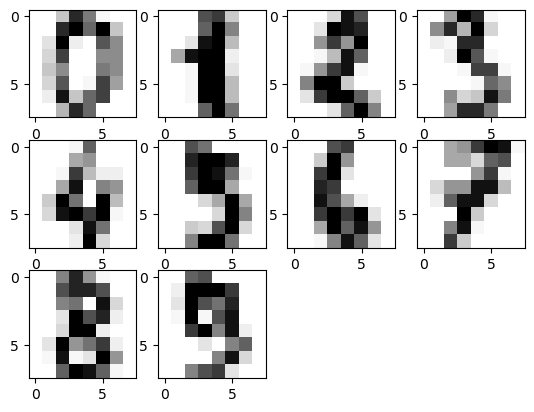

In [3]:
# Pull the first nine images from the images and their associated targets
example_images = tuple(zip(digits.images[:10], digits.target))

# Create a figure showing the images
for i, (idata, ilabel) in enumerate(example_images):
    sub = plt.subplot(3, 4, i+1)
    sub.imshow(idata, cmap='Greys')

# Create Classification Model to Predict Digits

## Re-shape Data for ML Input

In [4]:
# Flatten the structure of the array using reshape
# -1 tells NumPy to determine the row size from the
# length of the inner dimensions.
mnist_mldata = digits.images.reshape((len(digits.images), -1))

## Create Machine Learning Model: Support Vector Classifier

In [5]:
# Step 1: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    mnist_mldata, digits.target, test_size=0.3, shuffle=False)

In [6]:
# Step 2: Initialize machine learning algorithm
mnist_svm = svm.SVC()

# Step 3: Train model instance on the data
mnist_svm.fit(X_train, y_train)

# Step 4: Assess model performance on the testing data
mnist_svm.score(X_test, y_test)

0.9537037037037037

## Alternative Classification Algorithm: Random Forest

In [7]:
# Initialize model instance, fit training data, assess
mnist_rf = RandomForestClassifier()
mnist_rf.fit(X_train, y_train)
mnist_rf.score(X_test, y_test)

0.924074074074074

# Apply Model to Data and Visualize Results

In [8]:
# Apply SVC model to create a set of "predictions"
predictions_svm = mnist_svm.predict(X_test)

# Create a structure including sample images, predictions, and labels
example_predictions_svm = tuple(
    zip(digits.images[len(X_train):], predictions_svm, y_test))

# Check resulting structure to ensure that data combined correctly
example_incorrect_predictions_svm = tuple(
    filter(lambda v: v[1] != v[2], example_predictions_svm))

## Correctly Matched Images

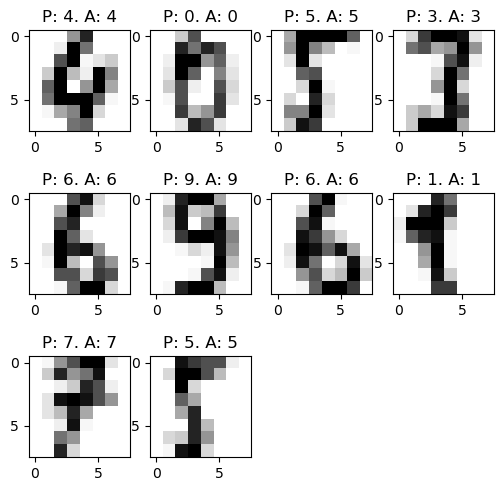

In [9]:
plt.figure(figsize=(6, 6))

# Visualize correctly matched images
for i, (idata, p, ilabel) in enumerate(example_predictions_svm[:10]):
    sub = plt.subplot(3, 4, i+1)
    sub.imshow(idata, cmap='Greys')
    plt.title('P: %s. A: %s' % (p, ilabel))

## Incorrectly Matched Images

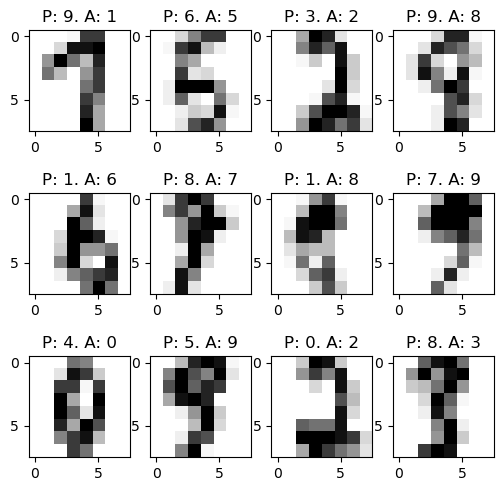

In [10]:
plt.figure(figsize=(6, 6))

# Visualize correctly matched images
for i, (idata, p, ilabel) in enumerate(example_incorrect_predictions_svm[:12]):
    sub = plt.subplot(3, 4, i+1)
    sub.imshow(idata, cmap='Greys')
    plt.title('P: %s. A: %s' % (p, ilabel))